In [2]:
import numpy as np
import pandas as pd
import cv2
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import pathlib
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

In [3]:
import os
import tensorflow as tf

# ✅ Check for GPU availability
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

# ✅ Define dataset path (update to match the location of the unzipped folder)
# Example: if you unzipped into /content/indian_monuments
path = "C:\\Users\\Shahnawaz\\OneDrive\\Desktop\\Shanu College\\Tourist_landmarks\\indian_monuments\\Indian-monuments\\images"

# ✅ Loop through dataset folders to count directories and images
for dirpath, dirnames, filenames in os.walk(path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")


Num GPUs Available:  0
There are 2 directories and 0 images in 'C:\Users\Shahnawaz\OneDrive\Desktop\Shanu College\Tourist_landmarks\indian_monuments\Indian-monuments\images'
There are 21 directories and 0 images in 'C:\Users\Shahnawaz\OneDrive\Desktop\Shanu College\Tourist_landmarks\indian_monuments\Indian-monuments\images\test'
There are 0 directories and 31 images in 'C:\Users\Shahnawaz\OneDrive\Desktop\Shanu College\Tourist_landmarks\indian_monuments\Indian-monuments\images\test\Ajanta Caves'
There are 0 directories and 36 images in 'C:\Users\Shahnawaz\OneDrive\Desktop\Shanu College\Tourist_landmarks\indian_monuments\Indian-monuments\images\test\alai_darwaza'
There are 0 directories and 35 images in 'C:\Users\Shahnawaz\OneDrive\Desktop\Shanu College\Tourist_landmarks\indian_monuments\Indian-monuments\images\test\alai_minar'
There are 0 directories and 30 images in 'C:\Users\Shahnawaz\OneDrive\Desktop\Shanu College\Tourist_landmarks\indian_monuments\Indian-monuments\images\test\basil

In [4]:
train_dir = path + "/train/"
test_dir = path + "/test/"
train_dir

'C:\\Users\\Shahnawaz\\OneDrive\\Desktop\\Shanu College\\Tourist_landmarks\\indian_monuments\\Indian-monuments\\images/train/'

In [5]:
import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir)  # Converts your training directory path into a Path object

# Gets the names of all subdirectories (i.e., class names) in the train_dir
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))

class_names  # Displays the class names


array(['Ajanta Caves', 'Ellora Caves', 'Fatehpur Sikri',
       'Gateway of India', 'Humayun_s Tomb', 'Khajuraho',
       'Sun Temple Konark', 'alai_darwaza', 'alai_minar',
       'basilica_of_bom_jesus', 'charminar', 'golden temple',
       'hawa mahal pics', 'iron_pillar', 'jamali_kamali_tomb',
       'lotus_temple', 'mysore_palace', 'qutub_minar', 'tajmahal',
       'tanjavur temple', 'victoria memorial'], dtype='<U21')

In [6]:
def view_random_image(target_dir, target_class):
    target_folder = target_dir  + target_class


    random_image = random.sample(os.listdir(target_folder), 1)


    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off");

    print(f"Image shape: {img.shape}") # show the shape of the image

    return img

In [7]:
import matplotlib.pyplot as plt

def plot_loss_curves(history):
    """
    Plots training and validation loss and accuracy from a history object.
    """
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(history.history['loss']))

    # Plot loss
    plt.plot(epochs, loss, label='training_loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()
    plt.show()

    # Plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label='training_accuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend()
    plt.show()


Image shape: (183, 275, 3)


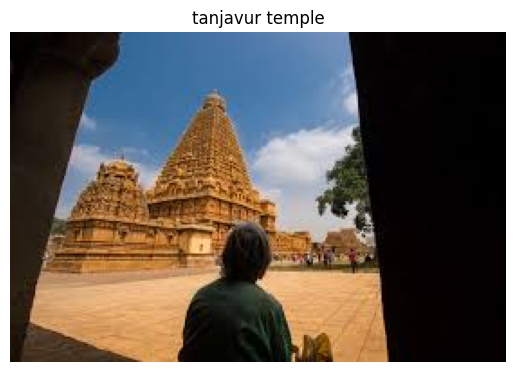

In [8]:
img = view_random_image(target_dir=train_dir, target_class=random.choice(class_names))

In [9]:
import torch 
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader

# ✅ Check GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# ✅ Define your dataset directories
# Make sure these are correctly set!
# train_dir = '/content/indian_monuments/train'
# test_dir = '/content/indian_monuments/test'
# ✅ Image Augmentation

train_transforms = transforms.Compose([
    transforms.Resize((300, 300)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20),
    transforms.RandomResizedCrop(300, scale=(0.9, 1.0)),
    transforms.ColorJitter(),
    transforms.ToTensor(),
])

test_transforms = transforms.Compose([
    transforms.Resize((300, 300)),
    transforms.ToTensor()
])

train_data = datasets.ImageFolder(train_dir, transform=train_transforms)
test_data = datasets.ImageFolder(test_dir, transform=test_transforms)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

# ✅ Load MobileNetV2 base model
base_model = models.mobilenet_v2(pretrained=True)

# ✅ Freeze base layers
for param in base_model.parameters():
    param.requires_grad = True


# ✅ Replace classifier head
num_classes = len(train_data.classes)
base_model.classifier = nn.Sequential(
    nn.Dropout(0.3),
    nn.Linear(base_model.last_channel, 128),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(128, num_classes)
)

model = base_model.to(device)

# ✅ Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.classifier.parameters(), lr=1e-4)



Using device: cuda


C:\Users\Shahnawaz\AppData\Roaming\Python\Python310\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Shahnawaz\AppData\Roaming\Python\Python310\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [29]:
import torch 
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader

# ✅ Check GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# ✅ Define dataset directories
# train_dir = '/content/indian_monuments/train'
# test_dir = '/content/indian_monuments/test'

# ✅ Image Augmentation
train_transforms = transforms.Compose([
    transforms.Resize((300, 300)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20),
    transforms.RandomResizedCrop(300, scale=(0.9, 1.0)),
    transforms.ColorJitter(),
    transforms.ToTensor(),
])

test_transforms = transforms.Compose([
    transforms.Resize((300, 300)),
    transforms.ToTensor()
])

train_data = datasets.ImageFolder(train_dir, transform=train_transforms)
test_data = datasets.ImageFolder(test_dir, transform=test_transforms)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

# ✅ Load ResNet-50 model with pretrained weights
base_model = models.resnet50(pretrained=True)

# ✅ Freeze all layers initially (you can unfreeze later for fine-tuning)
for param in base_model.parameters():
    param.requires_grad = False

# ✅ Replace the final fully connected layer
num_classes = len(train_data.classes)
base_model.fc = nn.Sequential(
    nn.Linear(base_model.fc.in_features, 256),
    nn.ReLU(),
    nn.Dropout(0.4),
    nn.Linear(256, num_classes)
)

model = base_model.to(device)

# ✅ Define loss and optimizer (only train the classifier head)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=1e-4)

print("✅ ResNet-50 model is ready for training!")


Using device: cuda
✅ ResNet-50 model is ready for training!


In [43]:
#MobileNet-V3 large
import torch 
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader

# ✅ Check GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# ✅ Define dataset directories
# train_dir = '/content/indian_monuments/train'
# test_dir = '/content/indian_monuments/test'

# ✅ Image Augmentation
train_transforms = transforms.Compose([
    transforms.Resize((300, 300)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20),
    transforms.RandomResizedCrop(300, scale=(0.9, 1.0)),
    transforms.ColorJitter(),
    transforms.ToTensor(),
])

test_transforms = transforms.Compose([
    transforms.Resize((300, 300)),
    transforms.ToTensor()
])

train_data = datasets.ImageFolder(train_dir, transform=train_transforms)
test_data = datasets.ImageFolder(test_dir, transform=test_transforms)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

# ✅ Load MobileNetV3-Large model with pretrained weights
base_model = models.mobilenet_v3_large(pretrained=True)

# ✅ Freeze all layers initially (you can unfreeze for fine-tuning later)
for param in base_model.parameters():
    param.requires_grad = False

# ✅ Replace the classifier head
num_classes = len(train_data.classes)
base_model.classifier = nn.Sequential(
    nn.Linear(base_model.classifier[0].in_features, 256),
    nn.ReLU(),
    nn.Dropout(0.4),
    nn.Linear(256, num_classes)
)

model = base_model.to(device)

# ✅ Define loss and optimizer (train only the classifier head)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.classifier.parameters(), lr=1e-4)

print("✅ MobileNetV3-Large model is ready for training!")


Using device: cuda


C:\Users\Shahnawaz\AppData\Roaming\Python\Python310\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Large_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Large_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v3_large-8738ca79.pth" to C:\Users\Shahnawaz/.cache\torch\hub\checkpoints\mobilenet_v3_large-8738ca79.pth
100%|██████████| 21.1M/21.1M [00:15<00:00, 1.42MB/s]

✅ MobileNetV3-Large model is ready for training!


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader

# ✅ Check GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# ✅ Image transforms
train_transforms = transforms.Compose([
    transforms.Resize((300, 300)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20),
    transforms.RandomResizedCrop(300, scale=(0.9, 1.0)),
    transforms.ColorJitter(),
    transforms.ToTensor(),
])

test_transforms = transforms.Compose([
    transforms.Resize((300, 300)),
    transforms.ToTensor()
])

# ✅ Datasets
train_data = datasets.ImageFolder(train_dir, transform=train_transforms)
test_data = datasets.ImageFolder(test_dir, transform=test_transforms)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

# ✅ Load EfficientNet-B3
effnet = models.efficientnet_b3(pretrained=True)

# ✅ Freeze feature extractor
for param in effnet.parameters():
    param.requires_grad = False

# ✅ Replace classifier head
num_classes = len(train_data.classes)
effnet.classifier = nn.Sequential(
    nn.Linear(effnet.classifier[1].in_features, 256),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(256, num_classes)
)

# ✅ Move to device
model = effnet.to(device)

# ✅ Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.classifier.parameters(), lr=1e-4)

print("✅ EfficientNet-B3 model is ready for training!")


Using device: cuda


C:\Users\Shahnawaz\AppData\Roaming\Python\Python310\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B3_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/efficientnet_b3_rwightman-b3899882.pth" to C:\Users\Shahnawaz/.cache\torch\hub\checkpoints\efficientnet_b3_rwightman-b3899882.pth
100%|██████████| 47.2M/47.2M [00:21<00:00, 2.36MB/s]


✅ EfficientNet-B3 model is ready for training!


In [10]:
from tqdm import tqdm
num_epochs = 10

for epoch in range(num_epochs):
    # Unfreeze the feature extractor after epoch 4
    if epoch > 4:
        for param in model.features.parameters():
            param.requires_grad = True
            
for epoch in range(num_epochs):
    # Training Phase
    model.train()
    train_loss = 0.0
    train_correct, train_total = 0, 0
    train_loop = tqdm(train_loader, desc=f"Epoch [{epoch+1}/{num_epochs}]", leave=False)

    for images, labels in train_loop:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()

        train_loop.set_postfix({
            'Loss': loss.item(),
            'Train Acc': f"{100 * train_correct / train_total:.2f}%"
        })

    # Validation Phase
    model.eval()
    val_loss = 0.0
    val_correct, val_total = 0, 0

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

    # Logging
    print(f"✅ Epoch {epoch+1}/{num_epochs} -- "
          f"Train Loss: {train_loss:.4f}, Train Acc: {100 * train_correct / train_total:.2f}% || "
          f"Val Loss: {val_loss:.4f}, Val Acc: {100 * val_correct / val_total:.2f}%")

    # Save checkpoint
    torch.save({
        'epoch': epoch+1,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'loss': val_loss,





        
    }, f"checkpoint_epoch_{epoch+1}.pth")
    

✅ Epoch 1/10 -- Train Loss: 541.4002, Train Acc: 17.88% || Val Loss: 87.7357, Val Acc: 18.25%


✅ Epoch 2/10 -- Train Loss: 461.0610, Train Acc: 39.46% || Val Loss: 80.7897, Val Acc: 35.46%


✅ Epoch 3/10 -- Train Loss: 390.4004, Train Acc: 49.61% || Val Loss: 76.7852, Val Acc: 41.03%


✅ Epoch 4/10 -- Train Loss: 339.4580, Train Acc: 54.74% || Val Loss: 75.4801, Val Acc: 43.61%


✅ Epoch 5/10 -- Train Loss: 305.5344, Train Acc: 57.56% || Val Loss: 74.7119, Val Acc: 46.70%


✅ Epoch 6/10 -- Train Loss: 278.6033, Train Acc: 61.67% || Val Loss: 75.1224, Val Acc: 45.77%


✅ Epoch 7/10 -- Train Loss: 258.9658, Train Acc: 63.21% || Val Loss: 74.9481, Val Acc: 47.32%


✅ Epoch 8/10 -- Train Loss: 245.4911, Train Acc: 65.10% || Val Loss: 75.4981, Val Acc: 46.91%


✅ Epoch 9/10 -- Train Loss: 234.7030, Train Acc: 66.44% || Val Loss: 77.1335, Val Acc: 49.07%


✅ Epoch 10/10 -- Train Loss: 224.6758, Train Acc: 67.08% || Val Loss: 76.8890, Val Acc: 49.69%


In [39]:
print(f"Total training images: {len(train_data)}")
print(f"Total testing images: {len(test_data)}")


Total training images: 5966
Total testing images: 970


In [11]:
# Save final model
torch.save(model.state_dict(), 'efficientnet_b3_final.pth')


In [13]:
test_loader = DataLoader(test_dir, batch_size=32, shuffle=False)


ValueError: too many values to unpack (expected 2)

In [16]:
for batch in test_loader:
    print(f"Batch has {len(batch)} items")
    print(type(batch), batch)
    break


Batch has 32 items
<class 'list'> ['C', ':', '\\', 'U', 's', 'e', 'r', 's', '\\', 'S', 'h', 'a', 'h', 'n', 'a', 'w', 'a', 'z', '\\', 'O', 'n', 'e', 'D', 'r', 'i', 'v', 'e', '\\', 'D', 'e', 's', 'k']


In [19]:
from torchvision import datasets, transforms

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

# Assuming test images are organized like: test/class1/img1.jpg, test/class2/img2.jpg
test_dataset = datasets.ImageFolder(test_dir, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [20]:
for inputs, labels in test_loader:
    print(inputs.shape, labels.shape)
    break


torch.Size([32, 3, 224, 224]) torch.Size([32])


In [21]:
from sklearn.metrics import classification_report, accuracy_score
import torch.nn.functional as F

def evaluate_on_test(model, test_loader, criterion, device):
    model.eval()
    test_loss = 0.0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            test_loss += loss.item()

            preds = outputs.argmax(dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    avg_loss = test_loss / len(test_loader)
    accuracy = accuracy_score(all_labels, all_preds)
    report = classification_report(all_labels, all_preds, zero_division=0)

    print(f"🔍 Test Loss: {avg_loss:.4f}, Test Accuracy: {accuracy*100:.2f}%")
    print("\n📋 Classification Report:\n", report)


In [22]:
criterion = nn.CrossEntropyLoss()
evaluate_on_test(model, test_loader, criterion, device)


🔍 Test Loss: 2.8433, Test Accuracy: 48.35%

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.84      0.87        31
           1       0.92      0.68      0.78        34
           2       0.97      0.81      0.88        42
           3       0.86      1.00      0.92        30
           4       0.00      0.00      0.00        81
           5       0.00      0.00      0.00        30
           6       0.14      0.07      0.09       103
           7       0.03      0.03      0.03        40
           8       0.03      0.03      0.03        36
           9       0.00      0.00      0.00        35
          10       0.00      0.00      0.00        30
          11       0.00      0.00      0.00         1
          12       0.04      0.05      0.04        65
          13       0.84      0.78      0.81       100
          14       0.92      0.98      0.95        46
          15       0.90      0.87      0.88        30
          1

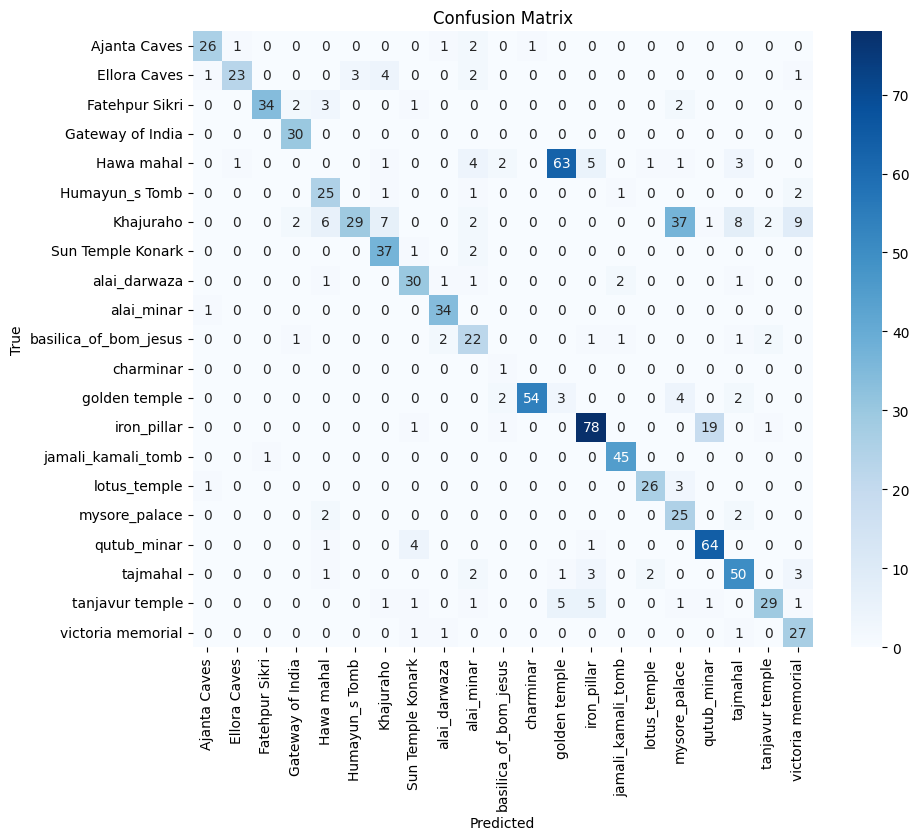

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, test_loader, device):
    model.eval()
    all_preds = []
    all_labels = []

    # Generate predictions and labels
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            preds = outputs.argmax(dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Compute confusion matrix
    cm = confusion_matrix(all_labels, all_preds)

    # Plot confusion matrix using seaborn heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=test_loader.dataset.classes, yticklabels=test_loader.dataset.classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.show()

# Call the function to plot confusion matrix
plot_confusion_matrix(model, test_loader, device)
